# Feature Matching

- 학번 : 20223196
- 이름 : 이준호

---

OpenCV를 사용하여 feature description을 얻어내고, 이를 이용해 feature matching을 진행한다.

- 지난 시간에 얻은 ORB feature, SIFT feature 등에 대한 description을 얻어낸다.
- 이를 이용해 두 이미지 간의 feature matching을 진행한다.


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/3.4/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677)
- Colab에서 코드에 이상이 없음에도 불구하고 결과가 제대로 나오지 않을 경우, '런타임 다시 시작...'을 해보도록 한다.

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [1]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/py

In [2]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
numpy 1.22.4
opencv 3.4.18


In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

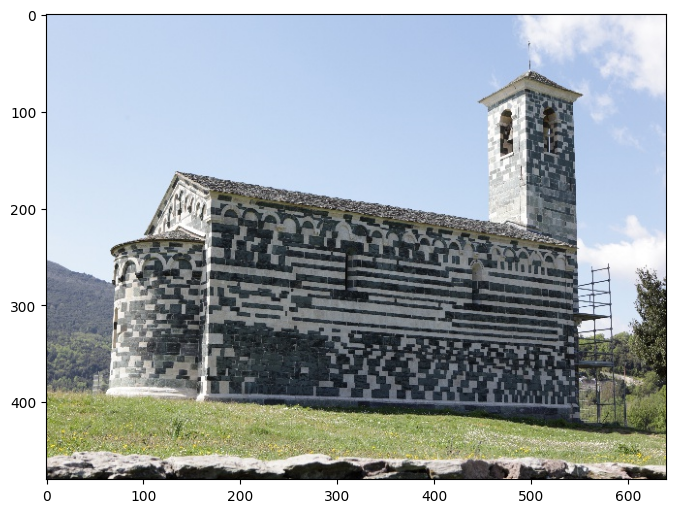

In [5]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Brute-Force Matching

brute-force matcher를 사용해 feature matching을 진행한다.

### feature matching을 진행할 두 이미지 불러오기

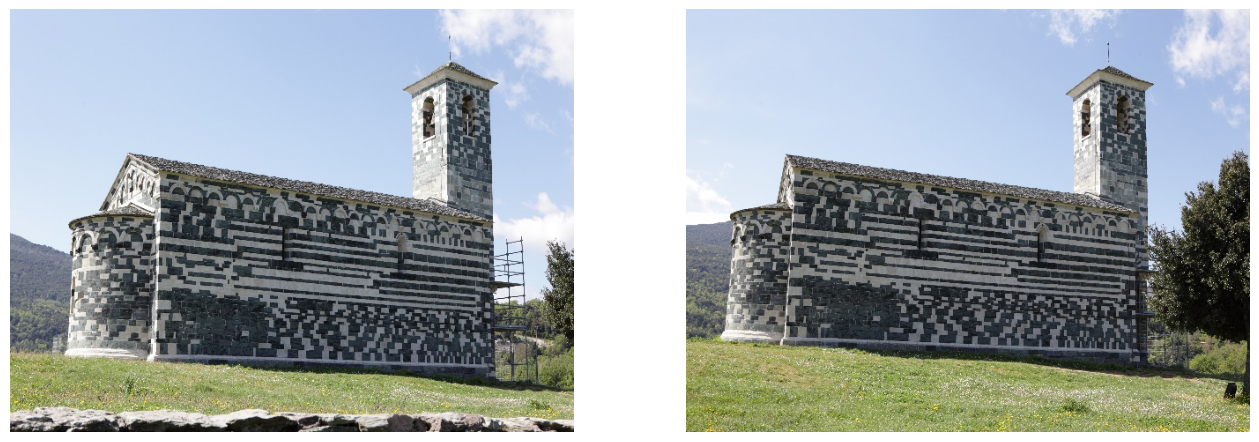

In [6]:
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(img2[:,:,::-1])
plt.axis('off')
plt.show()

### ORB feature 얻기

지난 과제를 통해 실습한 ORB feature를 구한다.

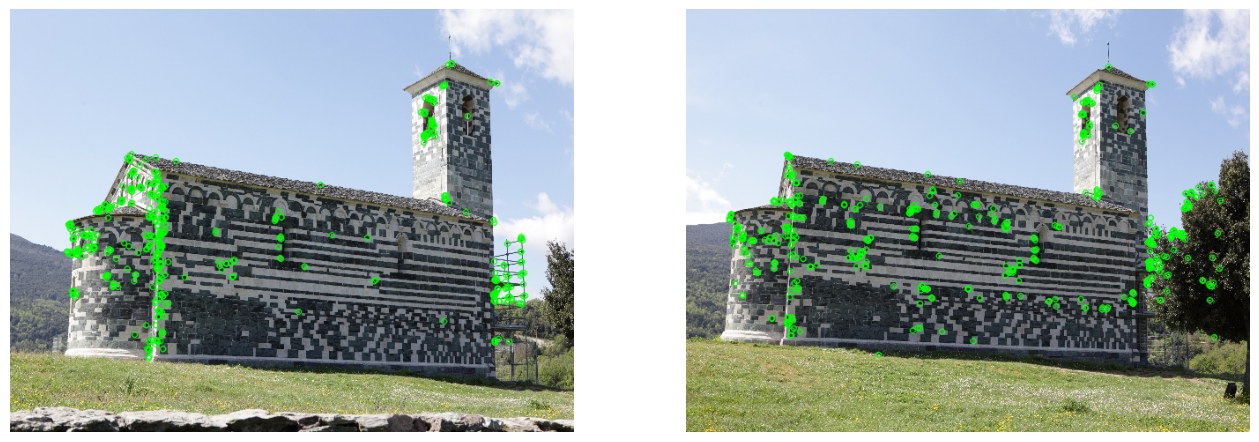

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# ORB 객체 생성
orb = cv.ORB_create()

# 키 포인트 및 기술자 추출
kp1 = orb.detect(gray1, None)
kp2 = orb.detect(gray2, None)

# ORB로 디스크립터를 계산
kp1, des1 = orb.compute(gray1, kp1)
kp2, des2 = orb.compute(gray2, kp2)

# 키 포인트 시각화
orb_kps_img1 = cv.drawKeypoints(img1, kp1, None, color=(0, 255, 0), flags=0)
orb_kps_img2 = cv.drawKeypoints(img2, kp2, None, color=(0, 255, 0), flags=0)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(orb_kps_img1[:,:,::-1])
plt.axis('off')
plt.subplot(122)
plt.imshow(orb_kps_img2[:,:,::-1])
plt.axis('off')
plt.show()


### ORB descriptor 구하기

**과제** 
- 찾은 feature에 대해 descriptor를 구한다.

관련 함수

- `	keypoints, descriptors	=	cv.Feature2D.compute(	image, keypoints[, descriptors]	)`
- `keypoints, descriptors	=	cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	)`

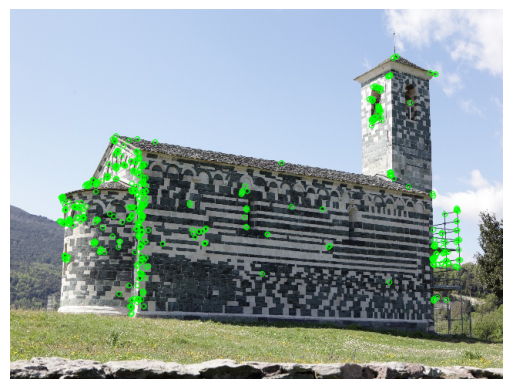

In [8]:
# To-do
import cv2 as cv
from matplotlib import pyplot as plt

# Load image
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# ORB object creation
orb = cv.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# Display the image with keypoints
plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Brute-Force Matching

**과제** 
- feature matching을 진행하고 시각화한다.
- matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.

관련 함수

`	<BFMatcher object>	=	cv.BFMatcher(	[, normType[, crossCheck]]	)
`


<brute-force matching without cycle-consistency>


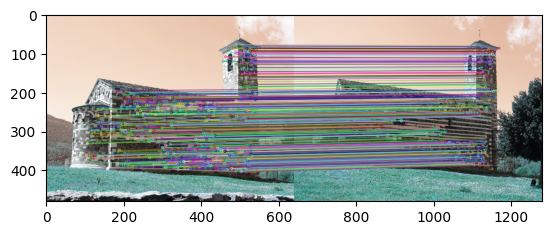

(<matplotlib.image.AxesImage at 0x7f06e5cadb70>, None)

In [18]:
# To-do

img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
print("<brute-force matching without cycle-consistency>")
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

<brute-force matching with cycle-consistency>


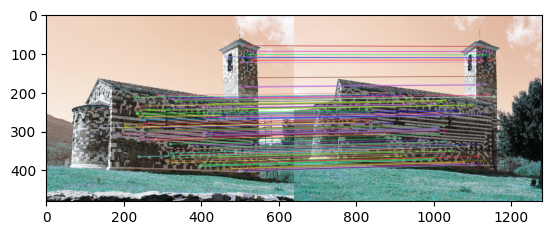

(<matplotlib.image.AxesImage at 0x7f06e5bdc250>, None)

In [10]:
# To-do

img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])


# Perform brute-force matching
matches1 = bf.knnMatch(des1, des2, k=2)
matches2 = bf.knnMatch(des2, des1, k=2)

# Apply cycle consistency
good_matches = []
for m1, m2 in zip(matches1, matches2):
    if m1[0].distance < 0.75 * m1[1].distance and m1[0].queryIdx == m2[0].trainIdx and m1[0].trainIdx == m2[0].queryIdx:
        good_matches.append(m1[0])

# Sort the matches by distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
print("<brute-force matching with cycle-consistency>")
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### SIFT feature 얻기

이번 단계에서는 SIFT feature에 대해 매칭을 진행한다.

지난 과제를 통해 실습한 SIFT feature를 구한다.

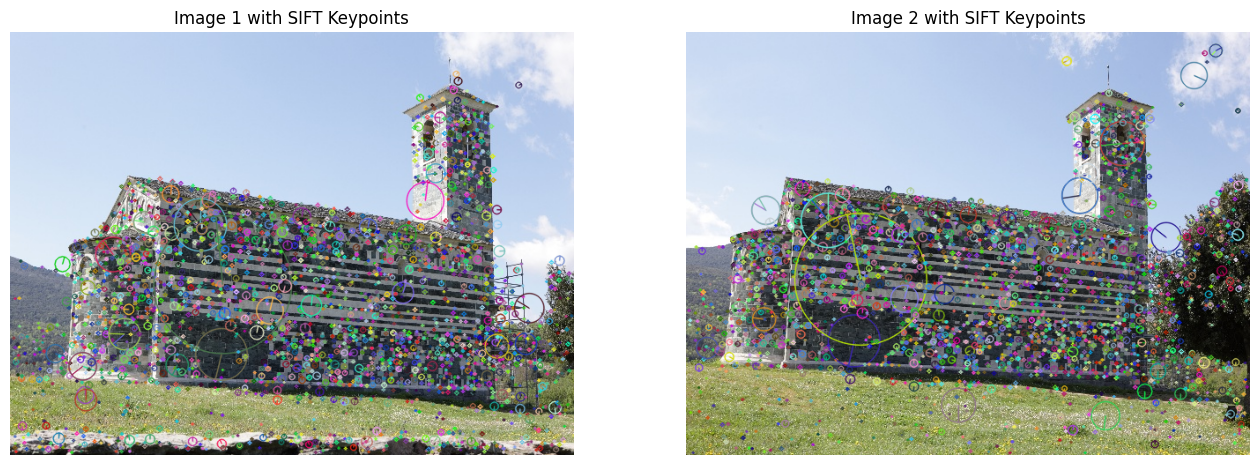

In [11]:

# Load the images
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')

# Convert images to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1 = sift.detect(gray1, None)
kp2 = sift.detect(gray2, None)

# Visualize keypoints
img_kp1 = cv.drawKeypoints(img1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp2 = cv.drawKeypoints(img2, kp2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(cv.cvtColor(img_kp1, cv.COLOR_BGR2RGB))
plt.title("Image 1 with SIFT Keypoints")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img_kp2, cv.COLOR_BGR2RGB))
plt.title("Image 2 with SIFT Keypoints")
plt.axis('off')
plt.show()


### SIFT descriptor 구하기

**과제** 
- 찾은 feature에 대해 descriptor를 구한다.

관련 함수

- `	keypoints, descriptors	=	cv.Feature2D.compute(	image, keypoints[, descriptors]	)`
- `keypoints, descriptors	=	cv.Feature2D.detectAndCompute(	image, mask[, descriptors[, useProvidedKeypoints]]	)`

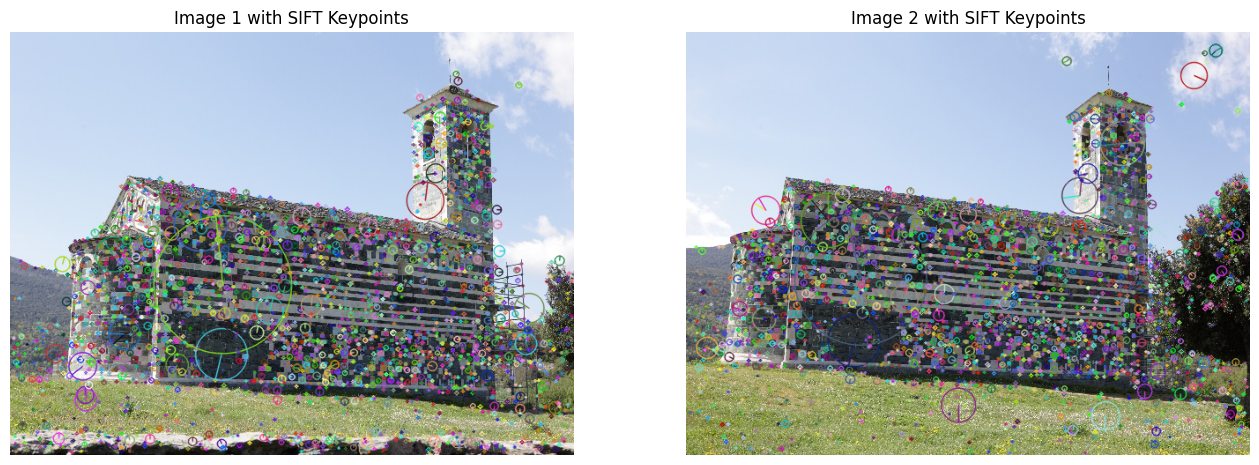

In [12]:
import cv2 as cv
from matplotlib import pyplot as plt

# Load the images
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')

# Convert images to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Visualize keypoints
img_kp1 = cv.drawKeypoints(img1, kp1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_kp2 = cv.drawKeypoints(img2, kp2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(cv.cvtColor(img_kp1, cv.COLOR_BGR2RGB))
plt.title("Image 1 with SIFT Keypoints")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img_kp2, cv.COLOR_BGR2RGB))
plt.title("Image 2 with SIFT Keypoints")
plt.axis('off')
plt.show()


### Brute-Force Matching

**과제** 
- feature matching을 진행하고 시각화한다.
- matcher에 cycle consistency를 추가하여 두 이미지를 비교한다.

관련 함수

`	<BFMatcher object>	=	cv.BFMatcher(	[, normType[, crossCheck]]	)
`


<brute-force matching with cycle-consistency>


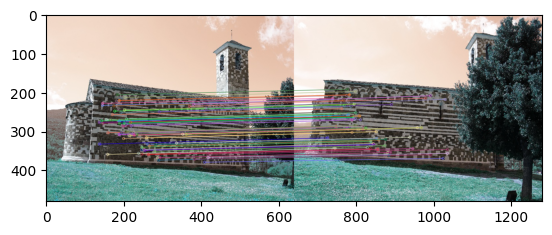

(<matplotlib.image.AxesImage at 0x7f06e1318280>, None)

In [20]:
# To-do

img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0013.JPG')

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])


# Perform brute-force matching
matches1 = bf.knnMatch(des1, des2, k=2)
matches2 = bf.knnMatch(des2, des1, k=2)

# Apply cycle consistency
good_matches = []
for m1, m2 in zip(matches1, matches2):
    if m1[0].distance < 0.75 * m1[1].distance and m1[0].queryIdx == m2[0].trainIdx and m1[0].trainIdx == m2[0].queryIdx:
        good_matches.append(m1[0])

# Sort the matches by distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
print("<brute-force matching with cycle-consistency>")
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## 다른 이미지에도 적용해보기

위 실습을 바탕으로 주어진 이미지 외에 다른 이미지에도 feature matching을 진행한다. 

- 한 물체를 다른 각도에서 찍은 이미지 2장을 불러온다. (직접 찍은 사진, 인터넷에서 다운로드한 사진 모두 가능)
- 이미지들에 대해 feature matching을 진행한다.
  - feature descriptor는 자유롭게 하나를 선택한다.
  - cycle consistency를 추가한 것과 아닌 것을 비교한다.


<brute-force matching with cycle-consistency>


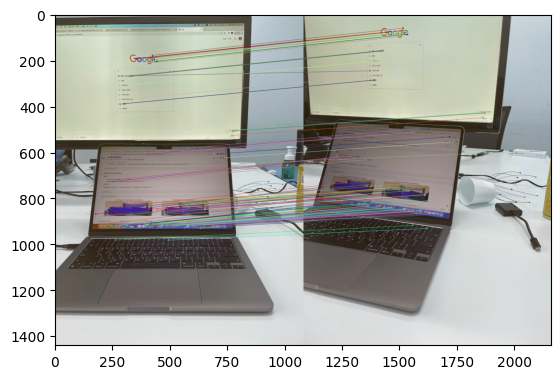

(<matplotlib.image.AxesImage at 0x7f06e5c23d30>, None)

In [14]:
# To-do
# <Test Brute-Force Matching>
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/KakaoTalk_Photo_2023-05-30-17-47-29 001.jpeg')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/KakaoTalk_Photo_2023-05-30-17-47-30 002.jpeg')

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.38*n.distance:
        good.append([m])


# Perform brute-force matching
matches1 = bf.knnMatch(des1, des2, k=2)
matches2 = bf.knnMatch(des2, des1, k=2)

# Apply cycle consistency
good_matches = []
for m1, m2 in zip(matches1, matches2):
    if m1[0].distance < 0.75 * m1[1].distance and m1[0].queryIdx == m2[0].trainIdx and m1[0].trainIdx == m2[0].queryIdx:
        good_matches.append(m1[0])

# Sort the matches by distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
print("<brute-force matching with cycle-consistency>")
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## 추가 점수 과제

- opencv에서는`BFMathcer` 외의 다른 matcher를 제공한다. 이러한 다른 matcher를 이용해 같은 과정을 진행한다.
- 해당 matcher에 대해 간단히 조사해 보고, 각 과정에 대한 설명도 기술한다.

<FLANN-based matching with cycle-consistency>


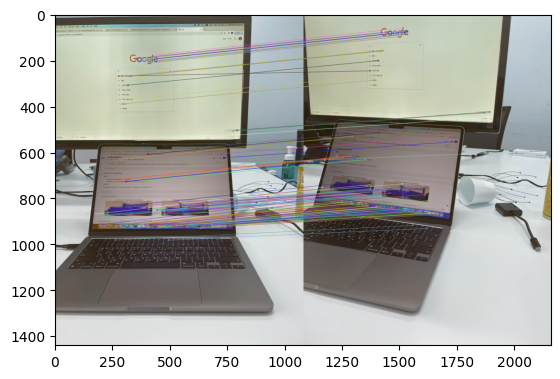

(<matplotlib.image.AxesImage at 0x7f06e5af28c0>, None)

In [19]:
# To-do
# cv.BFMatcher() -> cv.FlannBasedMatcher()

# Load the images
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/KakaoTalk_Photo_2023-05-30-17-47-29 001.jpeg')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/KakaoTalk_Photo_2023-05-30-17-47-30 002.jpeg')

# Initiate SIFT detector
sift = cv.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Create a FLANN-based matcher
flann = cv.FlannBasedMatcher()

# Perform matching
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.38 * n.distance:
        good.append([m])

# Perform brute-force matching
matches1 = flann.knnMatch(des1, des2, k=2)
matches2 = flann.knnMatch(des2, des1, k=2)

# Apply cycle consistency
good_matches = []
for m1, m2 in zip(matches1, matches2):
    if m1[0].distance < 0.75 * m1[1].distance and m1[0].queryIdx == m2[0].trainIdx and m1[0].trainIdx == m2[0].queryIdx:
        good_matches.append(m1[0])

# Sort the matches by distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
print("<FLANN-based matching with cycle-consistency>")
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3), plt.show()


**Brute-Force Matcher**

Brute-Force 매처는 간단합니다. 첫 번째 세트에서 한 기능의 설명자를 사용하고 일부 거리 계산을 사용하여 두 번째 세트의 다른 모든 기능과 일치시킵니다. 그리고 가장 가까운 것이 반환됩니다.

BF 매처의 경우 먼저 cv.BFMatcher() 를 사용하여 BFMatcher 개체를 만들어야 합니다 . 두 개의 선택적 매개변수가 필요합니다. 첫 번째는 normType입니다. 사용할 거리 측정을 지정합니다. 기본적으로 cv.NORM_L2 입니다 . SIFT, SURF 등에 유용합니다( cv.NORM_L1 도 있습니다). ORB, BRIEF, BRISK 등과 같은 이진 문자열 기반 설명자의 경우 해밍 거리를 측정으로 사용하는 cv.NORM_HAMMING을 사용해야 합니다. ORB가 WTA_K == 3 또는 4를 사용하는 경우 cv.NORM_HAMMING2를 사용해야 합니다.

두 번째 매개변수는 기본적으로 false인 부울 변수인 crossCheck입니다. true인 경우 Matcher는 집합 A의 i번째 설명자가 집합 B의 j번째 설명자를 최상의 일치로 포함하고 그 반대의 경우와 같이 값이 (i,j)인 일치 항목만 반환합니다. 즉, 두 세트의 두 기능이 서로 일치해야 합니다. 일관된 결과를 제공하며 SIFT 논문에서 D.Lowe가 제안한 비율 테스트의 좋은 대안입니다.




 **Fast Library Approximate Nearest Neighbors**

FLANN은 Approximate Nearest Neighbors를 위한 Fast Library의 약자입니다. 여기에는 대규모 데이터 세트에서 빠른 최근접 이웃 검색 및 고차원 기능에 최적화된 알고리즘 모음이 포함되어 있습니다. 대규모 데이터 세트의 경우 BFMatcher보다 빠르게 작동합니다. FLANN 기반 매처가 있는 두 번째 예를 볼 수 있습니다.

FLANN 기반 매처의 경우 사용할 알고리즘, 관련 매개변수 등을 지정하는 두 개의 사전을 전달해야 합니다. 첫 번째는 IndexParams입니다. 다양한 알고리즘에 대해 전달할 정보는 FLANN 문서에 설명되어 있습니다. 요약하면 SIFT, SURF 등과 같은 알고리즘의 경우 다음을 전달할 수 있습니다.

